In [456]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings('ignore')

In [457]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 160

In [458]:
df_raw = pd.read_csv('C:/Users/Poskrebyshev/JupyterNotebook/Python Studying/responses.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [459]:
df_raw.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

In [460]:
print('Размер датасета:', df_raw.shape)

Размер датасета: (1010, 150)


Как видно, в набор данных содержится довольно много фичей, характеризующих человека с самых разных сторон. В рамках данной работы предлагаем выполнить следующую задачу - попытаться предсказать, курит человек или нет, на основе его личных черт и взглядов на жизнь и демографических данных.

### Список фичей, которые будут использоваться в работе:
**HEALTH HABITS**
- Smoking: Never smoked - Tried smoking - Former smoker - Current smoker (categorical)

**PERSONALITY TRAITS, VIEWS ON LIFE & OPINIONS**
- Daily events: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Prioritising workload: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Writing notes: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Workaholism: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Thinking ahead: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Final judgement: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Reliability: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Keeping promises: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Loss of interest: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Friends versus money: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Funniness: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Fake: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Criminal damage: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Decision making: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Elections: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Self-criticism: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Judgment calls: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Hypochondria: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Empathy: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Eating to survive: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Giving: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Compassion to animals: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Borrowed stuff: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Loneliness: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Cheating in school: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Health: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Changing the past: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- God: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Dreams: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Charity: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Number of friends: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Punctuality: I am often early. - I am always on time. - I am often running late. (categorical)
- Lying: Never. - Only to avoid hurting someone. - Sometimes. - Everytime it suits me. (categorical)
- Waiting: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- New environment: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Mood swings: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Appearence and gestures: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Socializing: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Achievements: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Responding to a serious letter: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Children: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Assertiveness: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Getting angry: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Knowing the right people: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Public speaking: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Unpopularity: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Life struggles: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Happiness in life: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Energy levels: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Small - big dogs: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Personality: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Finding lost valuables: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Getting up: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Interests or hobbies: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Parents' advice: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Questionnaires or polls: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- Internet usage: No time at all - Less than an hour a day - Few hours a day - Most of the day (categorical)

**DEMOGRAPHICS**
- Age: (integer)
- Height: (integer)
- Weight: (integer)
- Number of siblings: (integer)
- Gender: Female - Male (categorical)
- Left - right handed: Left handed - Right handed (categorical)
- Education: Currently a Primary school pupil - Primary school - Secondary school - College/Bachelor degree (categorical)
- Only child: No - Yes (categorical)
- Village - town: City - village (categorical)
- House - block of flats: house/bungalow - block of flats (categorical)

In [461]:
per_feat = df_raw[['Daily events', 'Prioritising workload', 'Writing notes', 'Workaholism',
               'Thinking ahead', 'Final judgement', 'Reliability', 'Keeping promises', 'Loss of interest',
               'Friends versus money', 'Funniness', 'Fake', 'Criminal damage', 'Decision making', 'Elections',
               'Self-criticism', 'Judgment calls', 'Hypochondria', 'Empathy', 'Eating to survive', 'Giving',
               'Compassion to animals', 'Borrowed stuff', 'Loneliness', 'Cheating in school', 'Health',
               'Changing the past', 'God', 'Dreams', 'Charity', 'Number of friends', 'Punctuality', 'Lying',
               'Waiting', 'New environment', 'Mood swings', 'Appearence and gestures', 'Socializing', 'Achievements',
               'Responding to a serious letter', 'Children', 'Assertiveness', 'Getting angry', 'Knowing the right people',
               'Public speaking', 'Unpopularity', 'Life struggles', 'Happiness in life', 'Energy levels', 'Small - big dogs',
               'Personality', 'Finding lost valuables', 'Getting up', 'Interests or hobbies', "Parents' advice",
               'Questionnaires or polls', 'Internet usage', 'Age', 'Height', 'Weight', 'Number of siblings',
               'Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats', 'Smoking']].copy()

In [462]:
per_feat.head()

,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Smoking
0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats,never smoked
1,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats,never smoked
2,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats,tried smoking
3,4.0,4.0,4.0,5.0,3.0,1.0,3.0,4.0,5.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,3.0,1,1.0,2.0,5.0,5.0,5.0,1.0,5.0,4.0,3,3.0,1,i am often early,only to avoid hurting someone,1.0,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,2.0,4.0,most of the day,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow,former smoker
4,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,3.0,1,3.0,3.0,4.0,3.0,5.0,3.0,4.0,5.0,3,3.0,3,i am always on time,everytime it suits me,3.0,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow,tried smoking


In [463]:
per_feat.columns

Index(['Daily events', 'Prioritising workload', 'Writing notes', 'Workaholism',
       'Thinking ahead', 'Final judgement', 'Reliability', 'Keeping promises',
       'Loss of interest', 'Friends versus money', 'Funniness', 'Fake',
       'Criminal damage', 'Decision making', 'Elections', 'Self-criticism',
       'Judgment calls', 'Hypochondria', 'Empathy', 'Eating to survive',
       'Giving', 'Compassion to animals', 'Borrowed stuff', 'Loneliness',
       'Cheating in school', 'Health', 'Changing the past', 'God', 'Dreams',
       'Charity', 'Number of friends', 'Punctuality', 'Lying', 'Waiting',
       'New environment', 'Mood swings', 'Appearence and gestures',
       'Socializing', 'Achievements', 'Responding to a serious letter',
       'Children', 'Assertiveness', 'Getting angry',
       'Knowing the right people', 'Public speaking', 'Unpopularity',
       'Life struggles', 'Happiness in life', 'Energy levels',
       'Small - big dogs', 'Personality', 'Finding lost valuables',
 

In [464]:
print('Количество дубликатов в датасете:', per_feat.duplicated().sum())

Количество дубликатов в датасете: 0


In [465]:
per_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Daily events                    1003 non-null   float64
 1   Prioritising workload           1005 non-null   float64
 2   Writing notes                   1007 non-null   float64
 3   Workaholism                     1005 non-null   float64
 4   Thinking ahead                  1007 non-null   float64
 5   Final judgement                 1003 non-null   float64
 6   Reliability                     1006 non-null   float64
 7   Keeping promises                1009 non-null   float64
 8   Loss of interest                1006 non-null   float64
 9   Friends versus money            1004 non-null   float64
 10  Funniness                       1006 non-null   float64
 11  Fake                            1009 non-null   float64
 12  Criminal damage                 10

In [466]:
per_feat.describe()

,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Age,Height,Weight,Number of siblings
count,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1003.000000,990.000000,990.000000,1004.000000
mean,3.074776,2.645771,3.083416,2.996020,3.414101,2.649053,3.858847,3.987116,2.708748,3.778884,3.293241,2.130823,2.604187,3.197813,3.415094,3.579104,3.987078,1.912525,3.858706,2.228713,2.976096,3.971087,4.017857,2.887017,3.744533,3.250743,2.952381,3.302579,3.297030,2.104270,3.343564,2.672294,3.475198,3.258449,3.597815,3.158209,2.963294,3.070717,3.621272,3.518849,3.014911,3.486111,3.521825,3.461768,3.031778,3.705765,3.633831,2.973161,3.292247,2.871769,3.592040,3.551142,3.265873,2.748509,20.433699,173.514141,66.405051,1.297809
std,1.118432,1.220629,1.408224,1.277285,1.136910,1.379370,0.933594,0.899092,1.353699,1.124774,1.128771,1.046883,1.504439,1.201009,1.574679,1.193008,0.971654,1.157413,1.131730,1.214452,1.309306,1.189677,1.052579,1.131757,1.253590,1.075319,1.278387,1.483010,0.683148,1.031344,1.055348,1.002907,1.152425,1.044675,0.943806,1.093190,0.935689,1.172117,1.120903,1.103233,1.173834,1.092452,1.268173,1.118380,1.374644,0.824323,1.001617,1.222621,0.643436,1.243674,1.309913,1.170850,0.865736,1.101502,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,62.000000,41.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,19.000000,167.000000,55.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000,2.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,2.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000

Как можно заметить, в нынешнем датасете содержатся:
1. Значения NaN, которые нужно устранить.
2. Категориальные признаки, которые требуют перекодировки в числовые значения.
3. Признаки 'Age', 'Height' и 'Weight' имеют гораздо больший размах значений относительно остальных признаков.

# Устранение пропущенных значений

In [467]:
print('Количество строк с пропущенными значенями:', per_feat[per_feat.isna().any(axis=1)].shape[0])

Количество строк с пропущенными значенями: 192


In [468]:
per_feat.isna().sum()

Daily events                       7
Prioritising workload              5
Writing notes                      3
Workaholism                        5
Thinking ahead                     3
Final judgement                    7
Reliability                        4
Keeping promises                   1
Loss of interest                   4
Friends versus money               6
Funniness                          4
Fake                               1
Criminal damage                    7
Decision making                    4
Elections                          3
Self-criticism                     5
Judgment calls                     4
Hypochondria                       4
Empathy                            5
Eating to survive                  0
Giving                             6
Compassion to animals              7
Borrowed stuff                     2
Loneliness                         1
Cheating in school                 4
Health                             1
Changing the past                  2
G

Для начала удалим записи, в которых содержатся пропущенные значения применительно для категориальных признаков.

In [469]:
per_feat.select_dtypes('object').columns

Index(['Punctuality', 'Lying', 'Internet usage', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats', 'Smoking'],
      dtype='object')

In [470]:
per_feat.dropna(axis = 'index', subset = ['Punctuality', 'Lying', 'Internet usage', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats', 'Smoking'], inplace = True)

In [471]:
print('Количество строк в датасете после удаления:', per_feat.shape[0])

Количество строк в датасете после удаления: 978


Для оставшихся признаков заполним пропуски медианой.

In [472]:
per_feat.fillna(per_feat.median(), inplace = True)

In [473]:
print('Количество строк с пропущенными значенями:', per_feat[per_feat.isna().any(axis=1)].shape[0])

Количество строк с пропущенными значенями: 0


# Перевод категориальных признаков в числовые значения

In [474]:
labelencoder = LabelEncoder()
per_feat[['Punctuality', 'Lying', 'Internet usage', 'Gender', 'Left - right handed', 'Education', 'Only child',
          'Village - town', 'House - block of flats', 'Smoking']] = per_feat[['Punctuality', 'Lying', 'Internet usage',
                                                                              'Gender', 'Left - right handed', 'Education',
                                                                              'Only child', 'Village - town', 'House - block of flats',
                                                                              'Smoking']].apply(labelencoder.fit_transform)
per_feat.head()

,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Smoking
0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,0,1,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,0,20.0,163.0,48.0,1.0,0,1,0,0,1,0,2
1,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,1,3,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,0,19.0,163.0,58.0,2.0,0,1,0,0,0,0,2
2,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,2,3,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,0,20.0,176.0,67.0,2.0,0,1,5,0,0,0,3
3,4.0,4.0,4.0,5.0,3.0,1.0,3.0,4.0,5.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,3.0,1,1.0,2.0,5.0,5.0,5.0,1.0,5.0,4.0,3,3.0,1,1,2,1.0,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0,2.0,4.0,2,22.0,172.0,59.0,1.0,0,1,0,1,0,1,1
4,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,3.0,1,3.0,3.0,4.0,3.0,5.0,3.0,4.0,5.0,3,3.0,3,0,0,3.0,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,0,20.0,170.0,59.0,1.0,0,1,5,0,1,1,3


In [475]:
labelencoder.classes_

array(['current smoker', 'former smoker', 'never smoked', 'tried smoking'],
      dtype=object)

# Масштабирование данных

Проверим числовые атрибуты на наличие выборосов.

<AxesSubplot:>

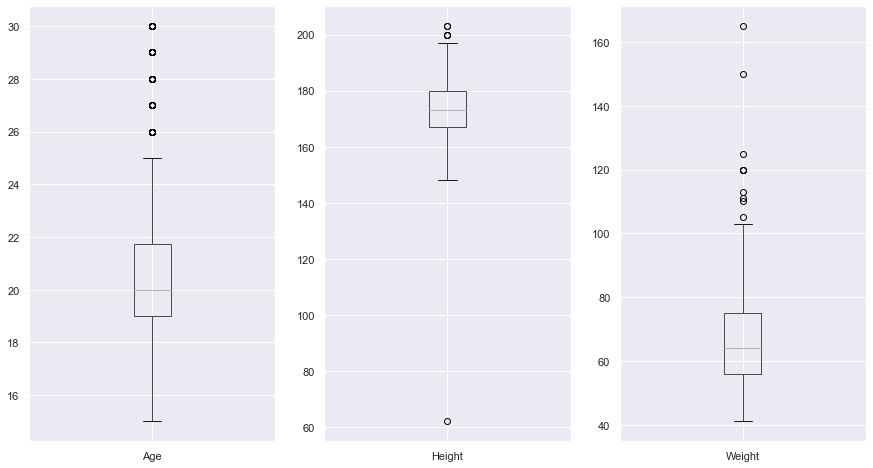

In [476]:
fig, ax = plt.pyplot.subplots(1,3, figsize=(15,8))
per_feat.boxplot(column=['Age'], ax = ax[0])
per_feat.boxplot(column=['Height'], ax = ax[1])
per_feat.boxplot(column=['Weight'], ax = ax[2])

Как показывает график, в признаках действительно содержится несколько выбросов, которые могут помешать нам при масштабировании.
Избавимся от них при помощи Z-оценки.

In [477]:
z = np.abs(stats.zscore(per_feat[['Age', 'Height', 'Weight']]))
per_feat = per_feat[(z<3).all(axis=1)]

<AxesSubplot:>

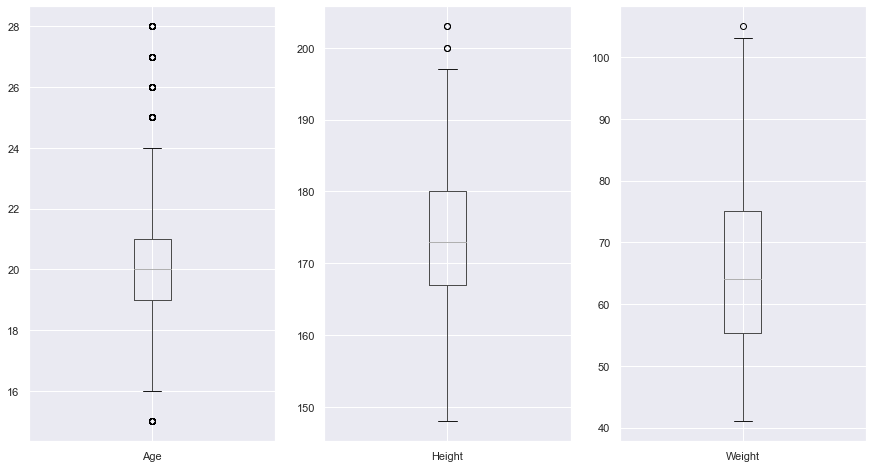

In [478]:
fig, ax = plt.pyplot.subplots(1,3, figsize=(15,8))
per_feat.boxplot(column=['Age'], ax = ax[0])
per_feat.boxplot(column=['Height'], ax = ax[1])
per_feat.boxplot(column=['Weight'], ax = ax[2])

Как видим на графиках, наблюдения, Z-оценка которых превышала 3, были удалены из датасета.

Теперь отмасштабируемый эти признаки с помощью MinMaxScaler'a.

In [479]:
scaler = MinMaxScaler()

per_feat["Age"] = scaler.fit_transform(per_feat.Age.values.reshape(-1,1))
per_feat["Weight"] = scaler.fit_transform(per_feat.Weight.values.reshape(-1,1))
per_feat["Height"] = scaler.fit_transform(per_feat.Height.values.reshape(-1,1))

In [480]:
per_feat.head()

,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Smoking
0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,0,1,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,0,0.384615,0.272727,0.109375,1.0,0,1,0,0,1,0,2
1,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,1,3,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,0,0.307692,0.272727,0.265625,2.0,0,1,0,0,0,0,2
2,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,2,3,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,0,0.384615,0.509091,0.406250,2.0,0,1,5,0,0,0,3
3,4.0,4.0,4.0,5.0,3.0,1.0,3.0,4.0,5.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,3.0,1,1.0,2.0,5.0,5.0,5.0,1.0,5.0,4.0,3,3.0,1,1,2,1.0,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0,2.0,4.0,2,0.538462,0.436364,0.281250,1.0,0,1,0,1,0,1,1
4,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,3.0,1,3.0,3.0,4.0,3.0,5.0,3.0,4.0,5.0,3,3.0,3,0,0,3.0,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,0,0.384615,0.400000,0.281250,1.0,0,1,5,0,1,1,3


# Отбор признаков

<AxesSubplot:>

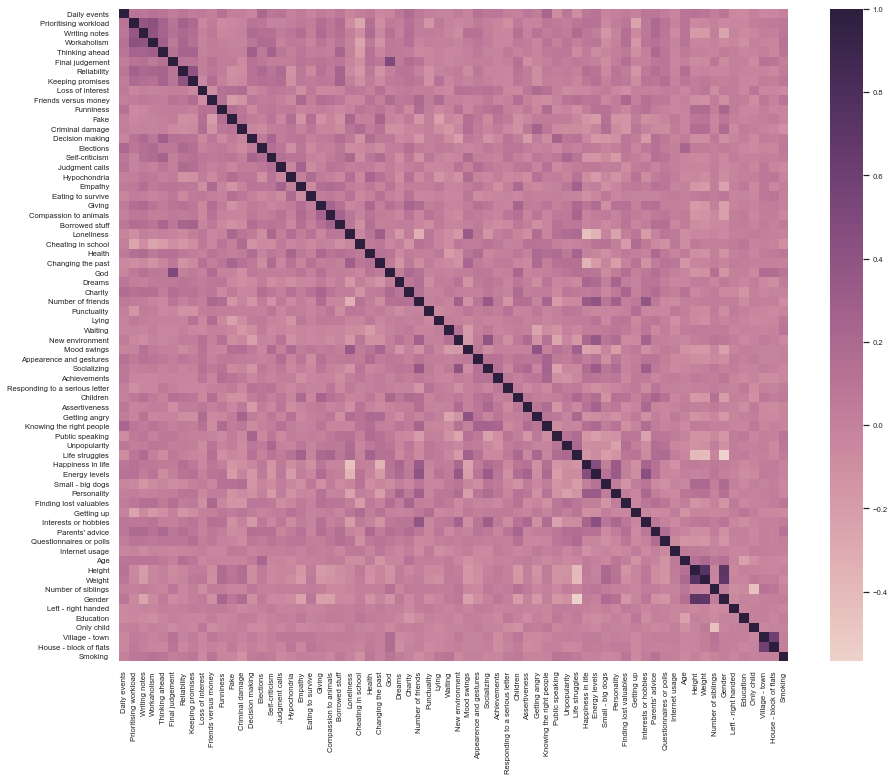

In [481]:
corr = per_feat.corr()
sns.set_theme(rc = {'figure.figsize': (15, 12)}, font_scale = 0.7)
sns.heatmap(corr, cmap = sns.cubehelix_palette(as_cmap = True))

In [482]:
cm1 = per_feat.corr()[(per_feat.corr().abs() >= 0.3) & (per_feat.corr().abs() < 0.7)]
cm1[cm1.notna().any()].dropna(axis=1, how = 'all')

,Prioritising workload,Writing notes,Workaholism,Final judgement,Reliability,Keeping promises,Loneliness,Changing the past,God,Number of friends,New environment,Mood swings,Socializing,Getting angry,Life struggles,Happiness in life,Energy levels,Personality,Interests or hobbies,Height,Weight,Number of siblings,Gender,Only child,Village - town,House - block of flats
Prioritising workload,NaN,0.364245,0.421823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Writing notes,0.364245,NaN,0.394147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workaholism,0.421823,0.394147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final judgement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reliability,NaN,NaN,NaN,NaN,NaN,0.394744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Keeping promises,NaN,NaN,NaN,NaN,0.394744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loneliness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.322216,NaN,0.326804,NaN,NaN,NaN,-0.447543,-0.347807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Changing the past,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.350764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
God,NaN,NaN,NaN,0.500601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of friends,NaN,NaN,NaN,NaN,NaN,NaN,-0.322216,NaN,NaN,NaN,NaN,NaN,0.339104,NaN,NaN,0.324796,0.399466,NaN,0.377523,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [483]:
cm2 = per_feat.corr()[(per_feat.corr().abs() >= 0.7) & (per_feat.corr().abs() < 1)]
cm2[cm2.notna().any()].dropna(axis=1, how = 'all')

,Height,Weight,Gender
Height,NaN,0.748195,0.720871
Weight,0.748195,NaN,NaN
Gender,0.720871,NaN,NaN


Как показывает график, датасет содержит несколько признаков, которые весьма умеренно коррелируют между собой. Вместе с этим, есть 3 признака, которые сильно коррелируют между собой.

Думаем, пока стоит оставить в покое признаки, обладающие умеренной корреляцией, а признак Height удалим.

Далее, мы бы хотели сократить количество фичей для увеличения скорости работы модели. Попробуем сделать это при помощи одномерного отбора признаков.

In [484]:
per_feat.drop(columns='Height', inplace = True)

In [485]:
X_raw = per_feat.drop(columns='Smoking')
y = per_feat.Smoking

In [486]:
best_feat = SelectKBest(chi2, k="all")
fit = best_feat.fit(X_raw,y)

df_score = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_raw.columns)

feature_scores = pd.concat([df_columns, df_score], axis=1)
feature_scores.columns = ["Specs", "Score"]

print(feature_scores[feature_scores.Score > 5].sort_values(by = 'Score', ascending= False))

                       Specs      Score
24        Cheating in school  25.921866
12           Criminal damage  18.918719
8           Loss of interest  11.601999
3                Workaholism   9.507919
51    Finding lost valuables   8.798532
27                       God   6.446425
30         Number of friends   6.373476
4             Thinking ahead   6.321599
14                 Elections   5.787907
33                   Waiting   5.517227
37               Socializing   5.202869
1      Prioritising workload   5.163879
43  Knowing the right people   5.005168


Отберем признаки, коэффициент Хи^2 которых составил более 5. Всего таких получилось 13.

In [487]:
X = X_raw[feature_scores[feature_scores.Score > 5].sort_values(by = 'Score', ascending= False).Specs.to_list()]
X.head()

,Cheating in school,Criminal damage,Loss of interest,Workaholism,Finding lost valuables,God,Number of friends,Thinking ahead,Elections,Waiting,Socializing,Prioritising workload,Knowing the right people
0,2.0,1.0,1.0,4.0,3.0,1.0,3,2.0,4.0,3.0,3.0,2.0,3.0
1,4.0,1.0,3.0,5.0,4.0,1.0,3,4.0,5.0,3.0,4.0,2.0,4.0
2,3.0,1.0,1.0,3.0,3.0,5.0,3,5.0,5.0,2.0,5.0,2.0,3.0
3,5.0,5.0,5.0,5.0,1.0,4.0,1,3.0,5.0,1.0,1.0,4.0,4.0
4,5.0,1.0,2.0,3.0,2.0,5.0,3,5.0,5.0,3.0,3.0,1.0,3.0


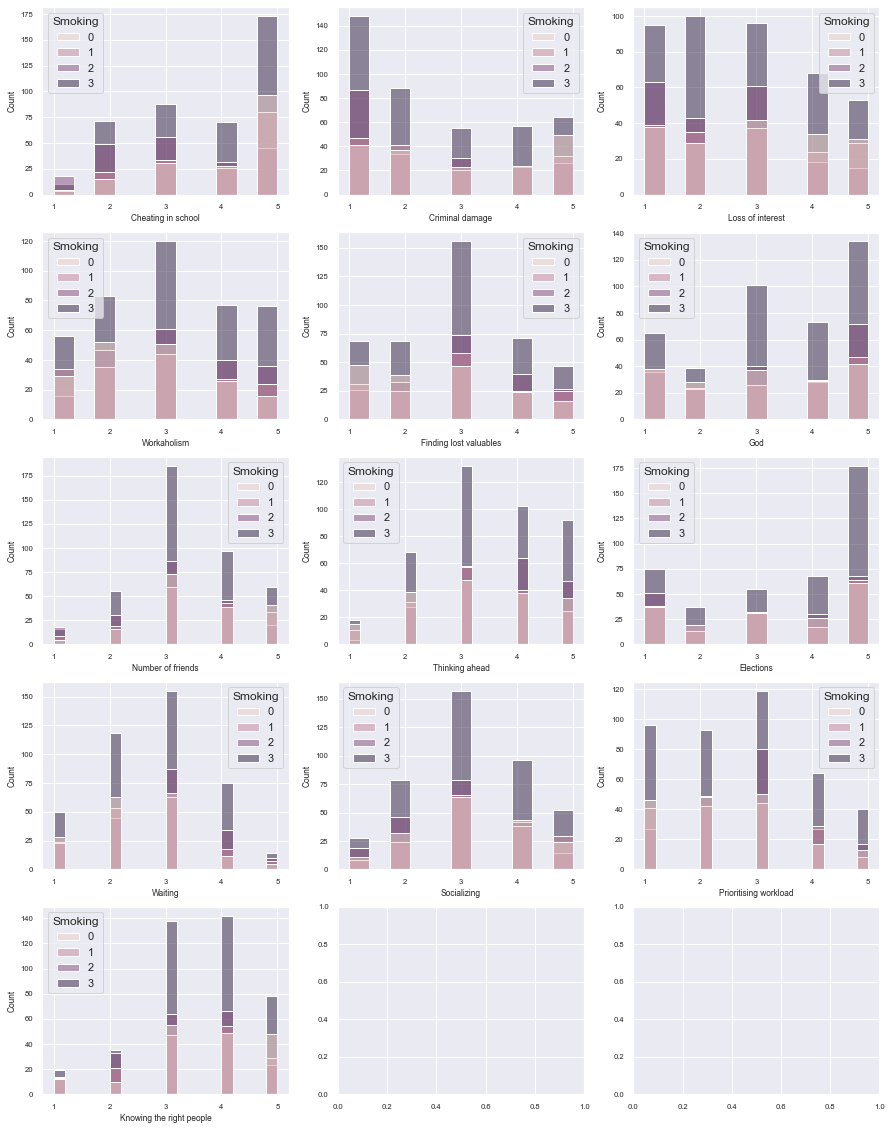

In [488]:
fig, ax = plt.pyplot.subplots(5, 3, figsize=(15,20))
sns.set_theme(font_scale = 1)
start = 0
for i in range(5):
    for j in range(3):
            if start == len(X.columns):
                break
            sns.histplot(per_feat, x = per_feat[X.columns[start]], hue = per_feat['Smoking'], ax = ax[i][j])
            start+=1

# Балансировка классов

Проверим, насколько часто экземпляры различных классов встречаются в датасете.

<AxesSubplot:xlabel='Smoking', ylabel='count'>

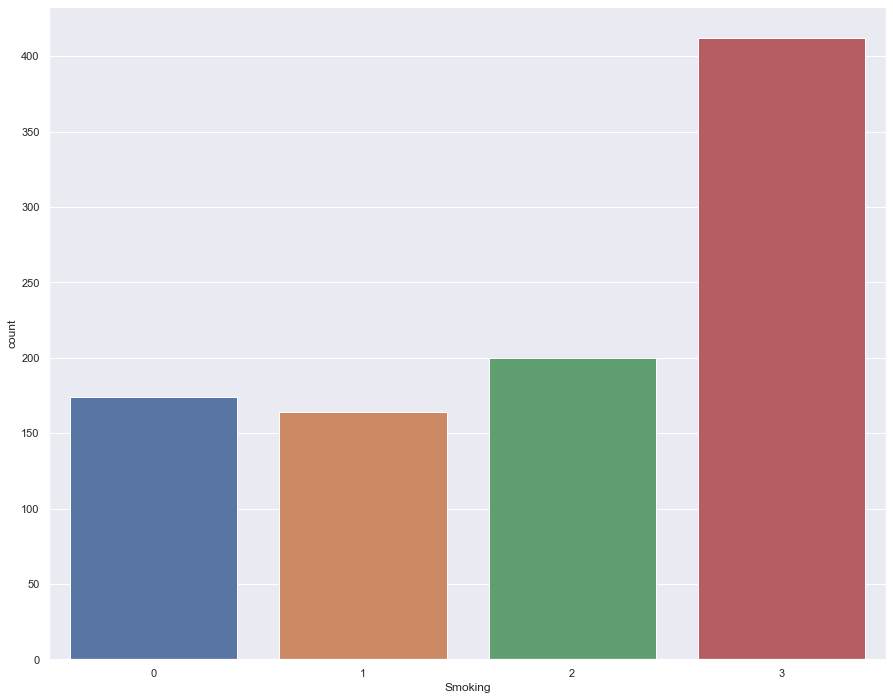

In [489]:
sns.countplot(y)

Исходя из данного графика, существует сильный перевес в 3-м классе, который необходимо устранить

Для решения проблемы несбалансированности классов было решено воспользоваться oversampling'ом, а именно - методом SMOTE, суть которого заключается в синтезе новых записей меньшего класса на основе имеющихся.

In [490]:
over_smote = SMOTE(random_state=42)
X_sampled, y_sampled = over_smote.fit_resample(X, y)

<AxesSubplot:xlabel='Smoking', ylabel='count'>

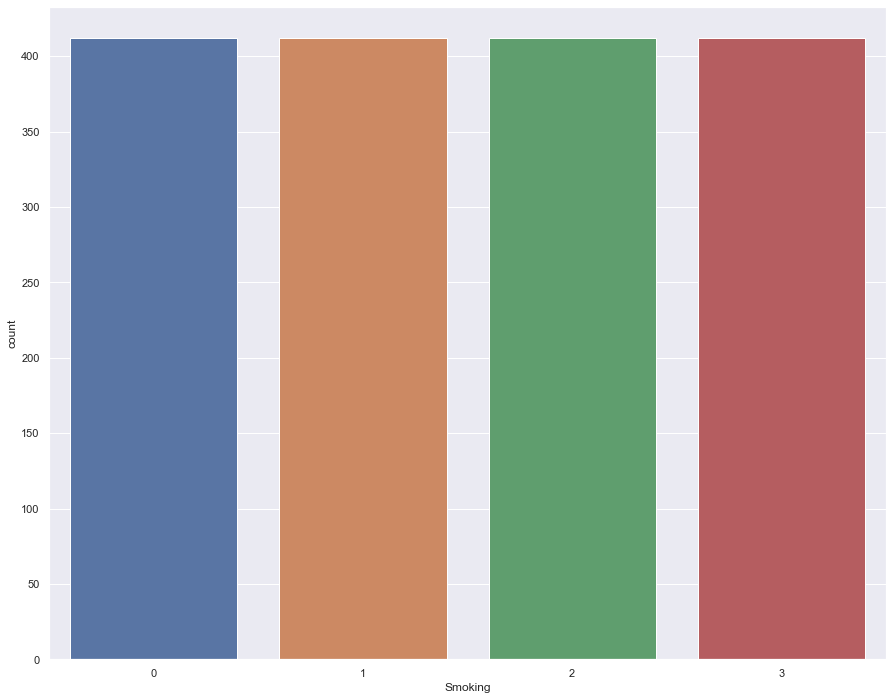

In [491]:
sns.countplot(x=y_sampled)

# Обучение алгоритмов машинного обучения

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

## Logistic Regression

In [493]:
log_reg = LogisticRegression()

parameters_lr = {
    "penalty": ['none', "l2"],
    "C":[0, 0.1, 1, 10, 100, 1000],
    "max_iter": [100, 200, 300, 400, 500, 1000]
}

log_reg_rs = GridSearchCV(log_reg, parameters_lr, cv=5)
log_reg_rs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400, 500, 1000],
                         'penalty': ['none', 'l2']})

In [494]:
log_reg_rs.best_params_

{'C': 0, 'max_iter': 100, 'penalty': 'none'}

In [495]:
log_reg_best = log_reg_rs.best_estimator_ 
y_pred_lr = log_reg_best.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.38      0.49      0.43       117
           1       0.35      0.18      0.23       142
           2       0.41      0.61      0.49       111
           3       0.32      0.27      0.29       125

    accuracy                           0.37       495
   macro avg       0.36      0.39      0.36       495
weighted avg       0.36      0.37      0.35       495



## Random Forest

In [496]:
rand_forest = RandomForestClassifier()

parameters_rfc = {
    "n_estimators": [10, 20, 30],
    "criterion": ["gini", "entropy"],
    "max_depth": [10, 15, 20, 30],
    "min_samples_split": [2, 4, 8, 16],
    "min_samples_leaf": [2, 4, 8, 16]
}

rand_forest_rs = GridSearchCV(rand_forest, parameters_rfc, cv=5)
rand_forest_rs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30],
                         'min_samples_leaf': [2, 4, 8, 16],
                         'min_samples_split': [2, 4, 8, 16],
                         'n_estimators': [10, 20, 30]})

In [497]:
rand_forest_rs.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 30}

In [498]:
rand_forest_best = rand_forest_rs.best_estimator_ 
y_pred_rf = rand_forest_best.predict(X_test)

print(classification_report(y_test, y_pred_rf,digits=5))

              precision    recall  f1-score   support

           0    0.61871   0.73504   0.67188       117
           1    0.78049   0.67606   0.72453       142
           2    0.59124   0.72973   0.65323       111
           3    0.59375   0.45600   0.51584       125

    accuracy                        0.64646       495
   macro avg    0.64605   0.64921   0.64137       495
weighted avg    0.65266   0.64646   0.64339       495



## KNN

In [499]:
knn = KNeighborsClassifier()

parameters_knn = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"]
}

knn_rs = RandomizedSearchCV(knn, parameters_knn, cv=5)
knn_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'weights': ['uniform', 'distance']})

In [500]:
knn_rs.best_params_

{'weights': 'distance', 'n_neighbors': 2, 'algorithm': 'ball_tree'}

In [501]:
knn_best = knn_rs.best_estimator_ 
y_pred_knn = knn_best.predict(X_test)

print(classification_report(y_test, y_pred_knn, digits=4))

              precision    recall  f1-score   support

           0     0.7290    0.9658    0.8309       117
           1     0.8400    0.8873    0.8630       142
           2     0.7519    0.8739    0.8083       111
           3     0.7377    0.3600    0.4839       125

    accuracy                         0.7697       495
   macro avg     0.7647    0.7718    0.7465       495
weighted avg     0.7682    0.7697    0.7474       495



# Результаты предсказания

Алгоритм KNN показал наилучшие результаты в предсказании, курит человек или нет. По комбинированной метрике f1-score, результат составил порядка 80+% для классов 'current smoker', 'former smoker', 'never smoked'. Так же радует, что метрика recall составляет 96% для класса 'current smoker'. Можно будет раздать книжки о вреде курения большому числу подростков :)

Предсказание класса 'tried smoking' показало весьма плачевные результаты - фактически, случайное присвоение класса. Возможно, это связано с тем, что много кто, независимо от жизненных взглядов, пробовал курить :)